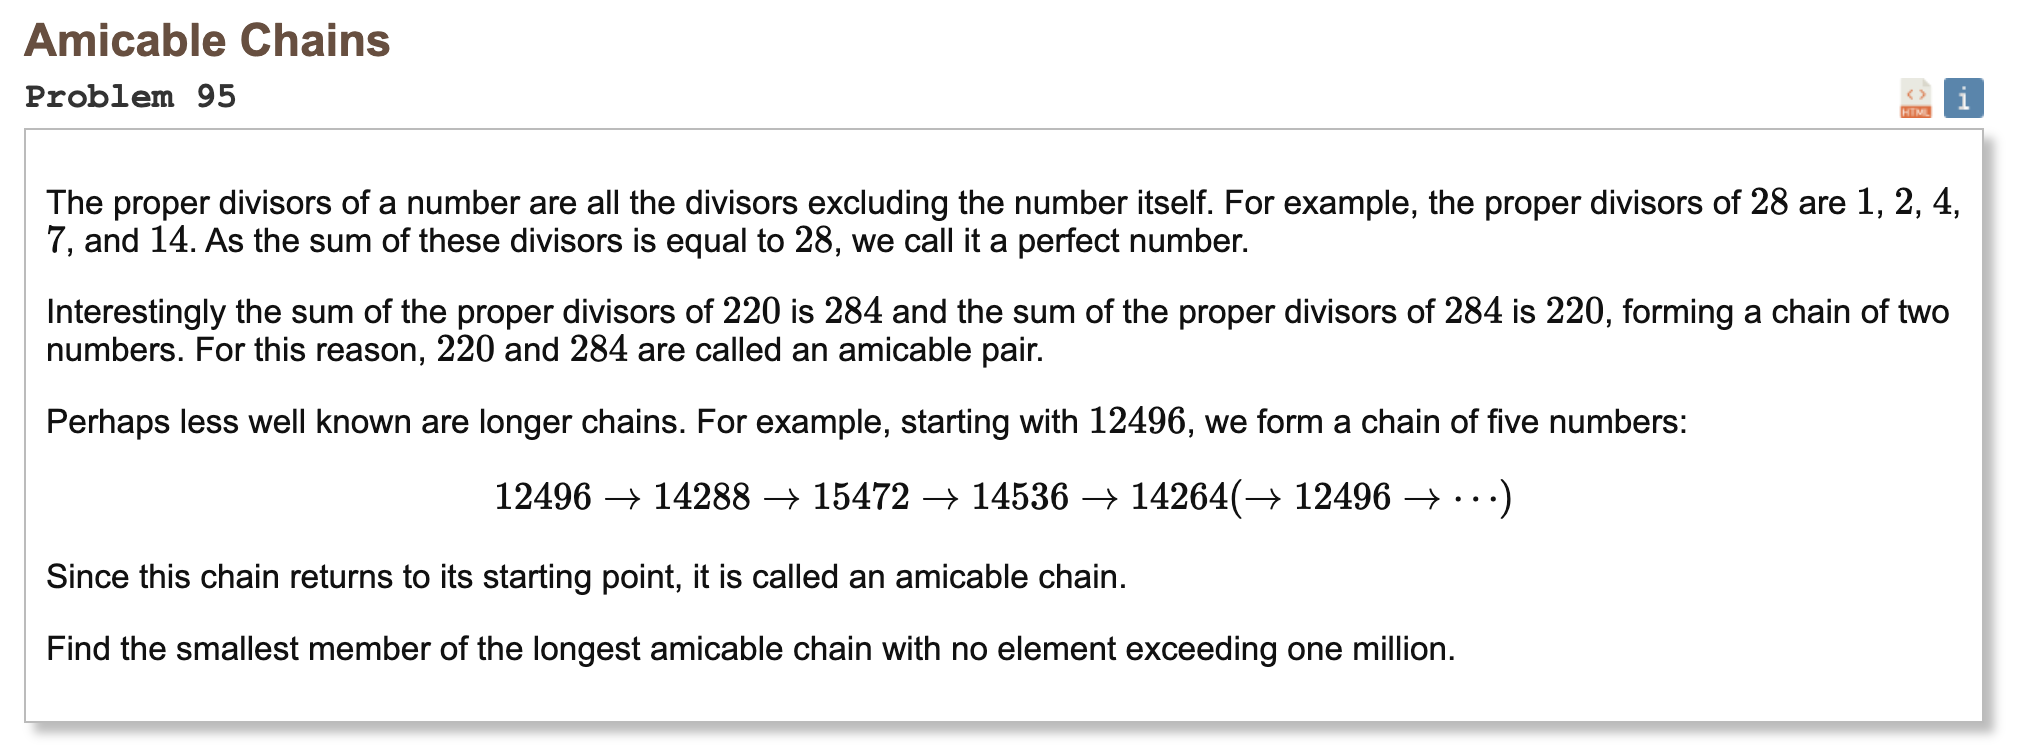

## Initial approach

Problem defines 3 things:

* perfect number
* amicable pair
* amicable chain

### Lets simulate perfect number

In [1]:
def sum_of_divisors(num):
    list1 = list()
    for i in range(1,num):
        if num%i==0:
            list1.append(i)
    return sum(list1)

print("-- Sum of Divisors --")
print("28:", sum_of_divisors(28))
print("220:", sum_of_divisors(220))
print("284:", sum_of_divisors(284))

-- Sum of Divisors --
28: 28
220: 284
284: 220


In [2]:
def is_perfect(num):
    if num == sum_of_divisors(num):
        return True
    return False

print("-- Is Perfect Number?")
print("28:", is_perfect(28))
print("220:", is_perfect(220))
print("284:", is_perfect(284))

-- Is Perfect Number?
28: True
220: False
284: False


### Simulate amicable pairs

In [3]:
amicable_dict = dict()
for i in range(1,1000):
    amicable_dict[i] = sum_of_divisors(i)

In [4]:
from collections import defaultdict

value_to_keys = defaultdict(list)

for key, value in amicable_dict.items():
    value_to_keys[value].append(key)

matched_keys = {val: keys for val, keys in value_to_keys.items() if len(keys) > 1}

print(matched_keys)

{1: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997], 6: [6, 25], 8: [10, 49], 16: [12, 26], 15: [16, 33], 21: [18, 51, 91], 22: [20, 38], 14: [22, 169], 13: [27, 35], 31: [32, 125, 161, 209, 221], 20: [34, 361], 55: [36, 329, 473, 533, 

### Generate Amicable Chain

* limit is 1 million
* for each number under 1 million, find the sum of divisors
* if the chain looks back to original number, its valid
* keep track of the longest chain
* return smallest number in the longest chain

```python
%%time

limit = 1_000_000
longest_chain = []
checked = set()

for start in range(2, limit):
    if start in checked:
        continue

    chain = []
    visited = set()
    num = start

    while num < limit and num not in visited:
        visited.add(num)
        chain.append(num)
        num = sum_of_divisors(num)

    if num == start:
        if len(chain) > len(longest_chain):
            longest_chain = chain

    checked.update(chain)

print(longest_chain)
````

#### Note: This code may take more than 5 minutes to run

```python
import math

def sum_of_divisors(num):
    if num < 2:
        return 0
    total = 1
    for i in range(2, int(math.sqrt(num)) + 1):
        if num % i == 0:
            total += i
            other = num // i
            if i != other:
                total += other
    return total
```

```python

%%time

limit = 1_000_000
longest_chain = []
checked = set()

for start in range(2, limit):
    if start in checked:
        continue

    chain = []
    visited = set()
    num = start

    while num < limit and num not in visited:
        visited.add(num)
        chain.append(num)
        num = sum_of_divisors(num)

    if num == start:
        if all(x < limit for x in chain):
            if len(chain) > len(longest_chain):
                longest_chain = chain

    checked.update(chain)

print("Longest amicable chain:", longest_chain)
print("Smallest member in the chain:", min(longest_chain))
```

#### Note: This code stil may take too long run

* keep improving the code

In [5]:
%%time

import math

def sum_of_divisors(num):
    if num < 2:
        return 0
    total = 1
    sqrt_n = int(math.sqrt(num))
    for i in range(2, sqrt_n + 1):
        if num % i == 0:
            total += i
            if i != num // i:
                total += num // i
    return total

limit = 1_000_000
longest_chain = []
checked = set()

for start in range(2, limit):
    if start in checked:
        continue

    chain = []
    visited = dict()
    num = start

    while num < limit and num not in visited:
        visited[num] = len(chain)
        chain.append(num)
        num = sum_of_divisors(num)

    if num in visited and num == chain[visited[num]]:
        cycle = chain[visited[num]:]
        if all(x < limit for x in cycle):
            if len(cycle) > len(longest_chain):
                longest_chain = cycle

    checked.update(chain)

print("Longest amicable chain:", longest_chain)
print("Smallest member in the chain:", min(longest_chain))

Longest amicable chain: [14316, 19116, 31704, 47616, 83328, 177792, 295488, 629072, 589786, 294896, 358336, 418904, 366556, 274924, 275444, 243760, 376736, 381028, 285778, 152990, 122410, 97946, 48976, 45946, 22976, 22744, 19916, 17716]
Smallest member in the chain: 14316
CPU times: user 1min 4s, sys: 322 ms, total: 1min 5s
Wall time: 1min 5s
